In [10]:
#Here is the code for Data Analysis and clustering
# Before jumping to clustering I decided to merge and clean the data that could be used further.


# RUN The SQL Query to merge Customer and Transaction Data
# select a.type, a.gender, a.birthdate, a.workActivity, a.occupationIndustry, a.totalincome, a.relationshipStatus, 
# a.habitationstatus, b.categorytags, b.currencyamount from custs as a left join trans as b on a.id = b.customerid

#Further remove any duplicate values in the join and imported customersdata.csv

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

DataFile = pd.read_csv("CustomerData.csv")

In [12]:
DataFile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 9 columns):
type                  542 non-null object
gender                542 non-null object
workActivity          378 non-null object
occupationIndustry    454 non-null object
totalincome           542 non-null float64
relationshipStatus    542 non-null object
habitationstatus      411 non-null object
categorytags          540 non-null object
currencyamount        540 non-null float64
dtypes: float64(2), object(7)
memory usage: 38.2+ KB


In [13]:
Target = DataFile["categorytags"]

In [14]:
#Drop rows having null values in currency amount
DataFile = DataFile.dropna(axis=0, subset=['currencyamount'])

In [15]:
DataFile.shape

(540, 9)

In [16]:
#**********************Exploratory Data Analytics***************************

In [17]:
###Explore the Categories

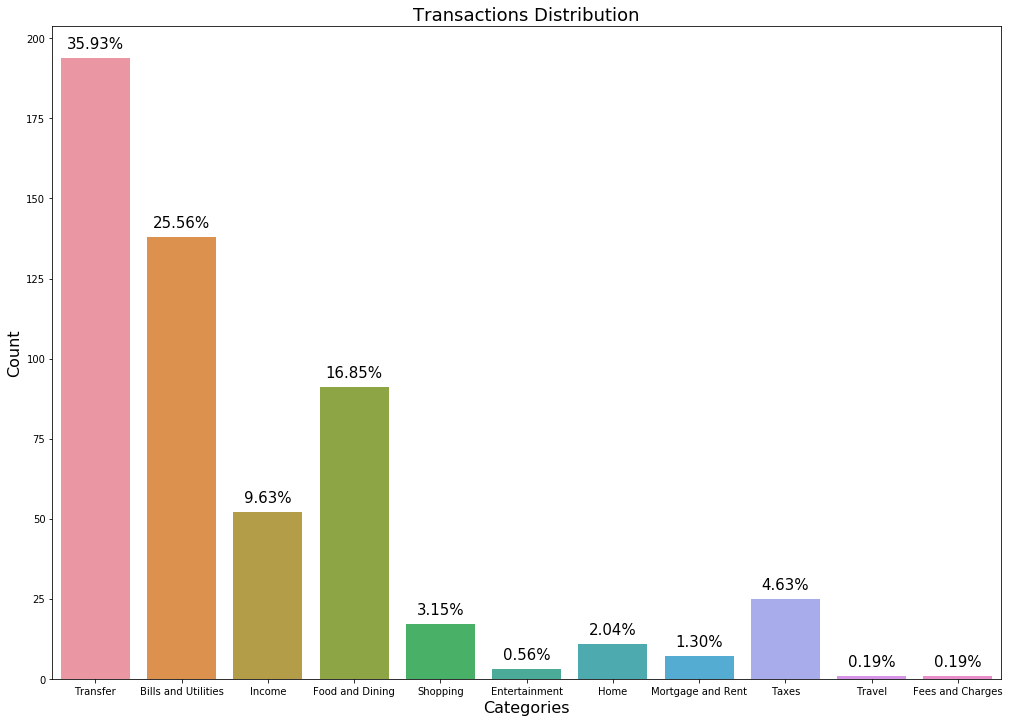

In [18]:
total = len(DataFile)
total_amt = DataFile.groupby(['categorytags'])['currencyamount'].sum().reset_index()
total_amt = DataFile.sort_values(by=['currencyamount'], ascending=False)
plt.figure(figsize=(17,12))

plot_tr = sns.countplot(x='categorytags', data=DataFile)
plot_tr.set_title("Transactions Distribution", fontsize=18)
plot_tr.set_xlabel("Categories", fontsize=16)
plot_tr.set_ylabel('Count', fontsize=16)
for p in plot_tr.patches:
    height = p.get_height()
    plot_tr.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=15) 

#### Transfer, Income, Mortgage and Rent, and Taxes are the transactions that are not related to the credit cards.

C:\Users\agupta8\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\agupta8\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 1152x864 with 0 Axes>

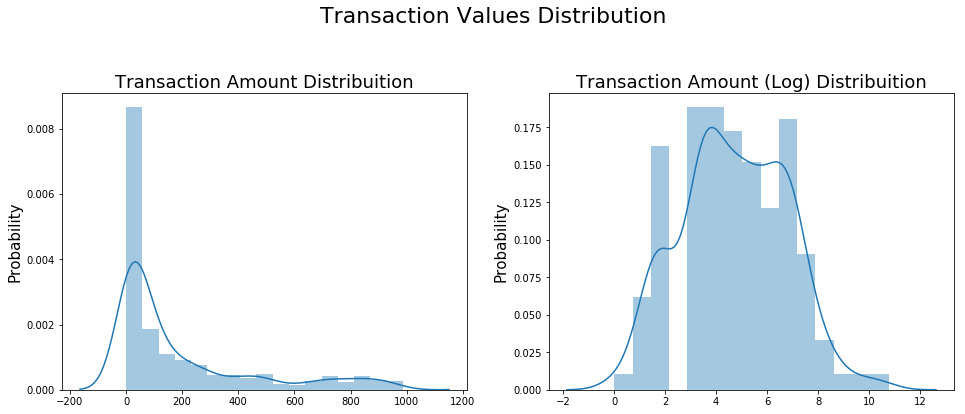

<Figure size 1152x864 with 0 Axes>

In [20]:
plt.figure(figsize=(16,12))
plt.suptitle('Transaction Values Distribution', fontsize=22)
plt.subplot(221)
sub_plot_1 = sns.distplot(DataFile[DataFile['currencyamount'] <= 1000]['currencyamount'])
sub_plot_1.set_title("Transaction Amount Distribuition", fontsize=18)
sub_plot_1.set_xlabel("")
sub_plot_1.set_ylabel("Probability", fontsize=15)

plt.subplot(222)
sub_plot_2 = sns.distplot(np.log(1+DataFile['currencyamount']))
sub_plot_2.set_title("Transaction Amount (Log) Distribuition", fontsize=18)
sub_plot_2.set_xlabel("")
sub_plot_2.set_ylabel("Probability", fontsize=15)

plt.figure(figsize=(16,12))

In [31]:
#Take the best 4 Categories
FilterCategory = ['Transfers', 'Income', 'Mortgage and Rent', 'Taxes']
FilterData = DataFile[(DataFile.categorytags != 'Transfer') & (DataFile.categorytags != 'Income') & (DataFile.categorytags != 'Mortgage and Rent') & (DataFile.categorytags != 'Fees and Charges') & (DataFile.categorytags != 'Taxes')]

In [98]:
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

In [36]:
###Explore the Transactions and Categories with Gender

Text(0,0.5,'Count')

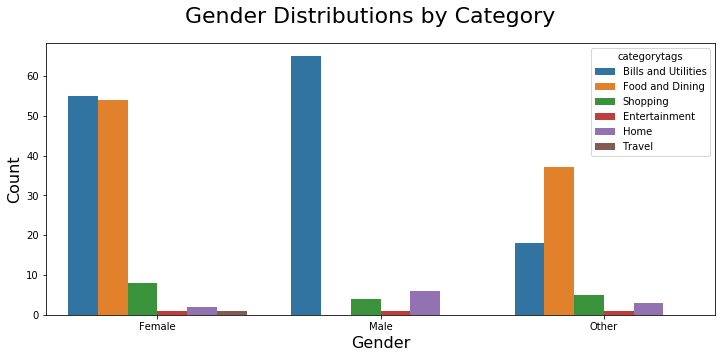

In [103]:
plt.figure(figsize=(12,5))
plt.suptitle('Gender Distributions by Category', fontsize=22)

plot_2 = sns.countplot(x='gender', hue='categorytags', data=FilterData)
plt.legend(title='categorytags', loc='upper right')
plot_2.set_xlabel("Gender", fontsize=16)
plot_2.set_ylabel("Count", fontsize=16)

In [104]:
## This indicates a good distribution for Transfer Cards and Bills and Utilities card

In [105]:
#Taking all the transactions greater than 1000

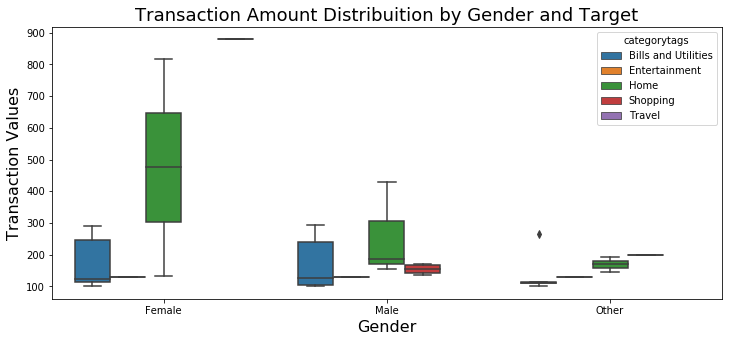

In [106]:
plt.figure(figsize=(12,5))
plot_3 = sns.boxplot(x='gender', y='currencyamount', hue='categorytags',data=FilterData[FilterData['currencyamount'] > 100])
plot_3.set_title("Transaction Amount Distribuition by Gender and Target", fontsize=18)
plot_3.set_xlabel("Gender", fontsize=16)
plot_3.set_ylabel("Transaction Values", fontsize=16)


#plt.subplots_adjust(hspace = 0.6, top = 0.85)

plt.show()

In [107]:
###Explore the Transactions and Categories with workActivity

In [108]:
import warnings
warnings.filterwarnings("ignore")
FilterData["workActivity"].fillna("Not Working", inplace = True)

Text(0,0.5,'Count')

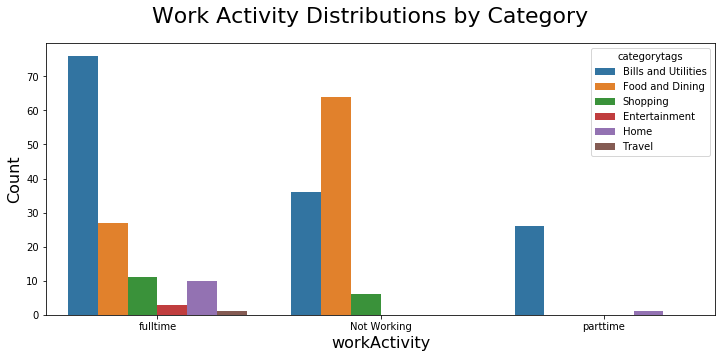

In [109]:
plt.figure(figsize=(12,5))
plt.suptitle('Work Activity Distributions by Category', fontsize=22)

plot_2 = sns.countplot(x='workActivity', hue='categorytags', data=FilterData)
plt.legend(title='categorytags', loc='upper right')
plot_2.set_xlabel("workActivity", fontsize=16)
plot_2.set_ylabel("Count", fontsize=16)

In [110]:
## Full Time workers use card in Utilities. Utilities is greater than transfer
## Food and Dining has higher values for Non working - Retired or Students

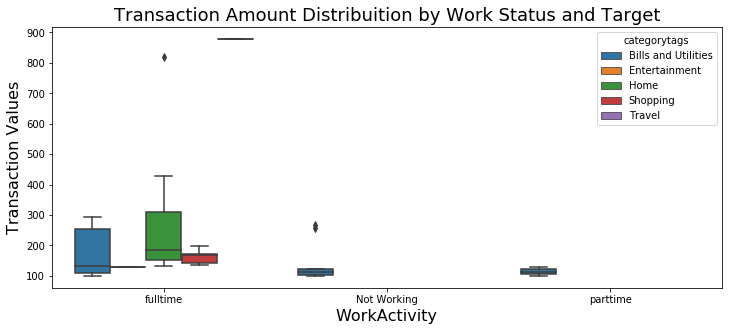

In [111]:
plt.figure(figsize=(12,5))
plot_3 = sns.boxplot(x='workActivity', y='currencyamount', hue='categorytags',data=FilterData[FilterData['currencyamount'] > 100])
plot_3.set_title("Transaction Amount Distribuition by Work Status and Target", fontsize=18)
plot_3.set_xlabel("WorkActivity", fontsize=16)
plot_3.set_ylabel("Transaction Values", fontsize=16)

plt.subplots_adjust(hspace = 0.6, top = 0.85)

plt.show()

In [112]:
###Explore the occupationIndustry and Categories with workActivity

In [113]:
warnings.filterwarnings("ignore")
FilterData["occupationIndustry"].fillna("Not Available", inplace = True)

Text(0,0.5,'Count')

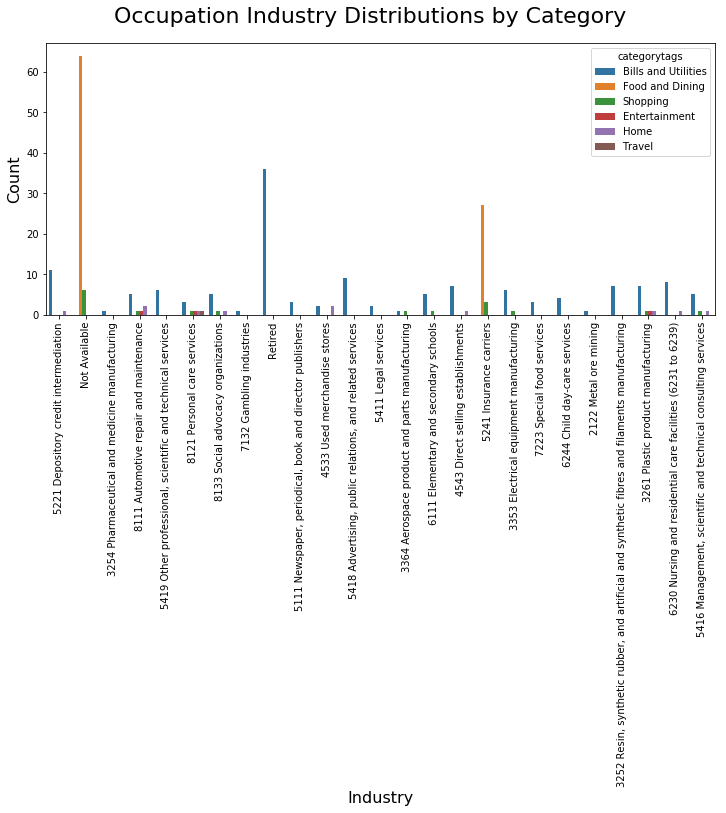

In [114]:
#tmp = pd.crosstab(FilterData['occupationIndustry'], FilterData['categorytags'], normalize='index') * 100
#tmp = tmp.reset_index()

plt.figure(figsize=(12,5))
plt.suptitle('Occupation Industry Distributions by Category', fontsize=22)

plot_2 = sns.countplot(x='occupationIndustry', hue='categorytags', data=FilterData)
plt.xticks(rotation=90)
plt.legend(title='categorytags', loc='upper right')
plot_2.set_xlabel("Industry", fontsize=16)
plot_2.set_ylabel("Count", fontsize=16)


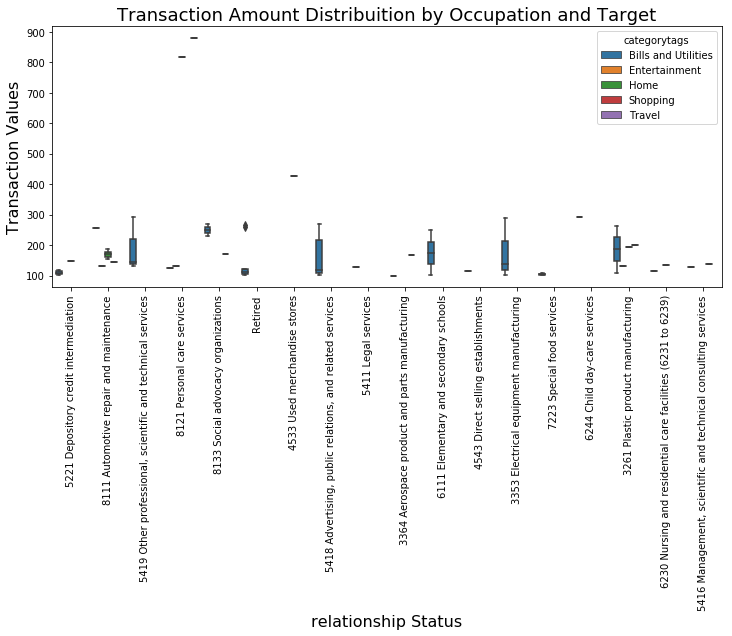

In [238]:
plt.figure(figsize=(12,5))
plot_3 = sns.boxplot(x='occupationIndustry', y='currencyamount', hue='categorytags',data=FilterData[FilterData['currencyamount'] > 100])
plot_3.set_title("Transaction Amount Distribuition by Occupation and Target", fontsize=18)
plot_3.set_xlabel("relationship Status", fontsize=16)
plot_3.set_ylabel("Transaction Values", fontsize=16)
plt.xticks(rotation=90)
plt.subplots_adjust(hspace = 0.6, top = 0.85)

plt.show()

In [115]:
# Bills and Utilities is significant in retired and Food and utilities is popular in Insurance careers

In [116]:
###Explore the Transactions and Categories with Relationship Status

Text(0,0.5,'Count')

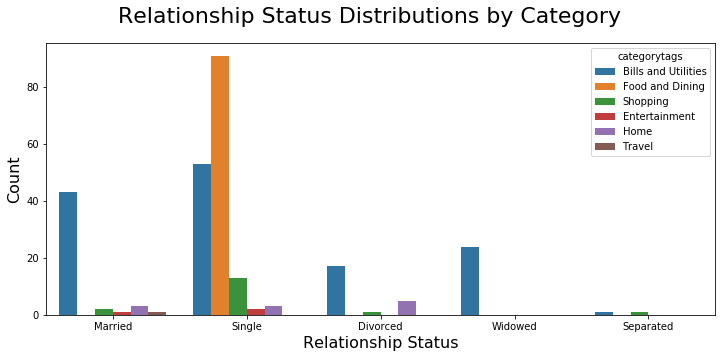

In [117]:
plt.figure(figsize=(12,5))
plt.suptitle('Relationship Status Distributions by Category', fontsize=22)

plot_2 = sns.countplot(x='relationshipStatus', hue='categorytags', data=FilterData)
plt.legend(title='categorytags', loc='upper right')
plot_2.set_xlabel("Relationship Status", fontsize=16)
plot_2.set_ylabel("Count", fontsize=16)

In [118]:
##Bill and Utilities is also significant in Divorced and Widowed categories

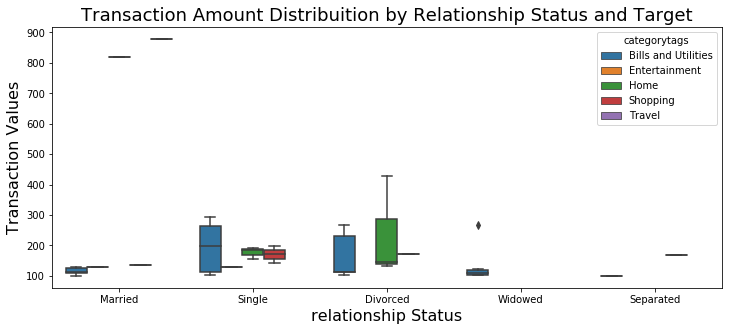

In [119]:
plt.figure(figsize=(12,5))
plot_3 = sns.boxplot(x='relationshipStatus', y='currencyamount', hue='categorytags',data=FilterData[FilterData['currencyamount'] > 100])
plot_3.set_title("Transaction Amount Distribuition by Relationship Status and Target", fontsize=18)
plot_3.set_xlabel("relationship Status", fontsize=16)
plot_3.set_ylabel("Transaction Values", fontsize=16)

plt.subplots_adjust(hspace = 0.6, top = 0.85)

plt.show()

In [120]:
####Explore the Transactions and Categories with habitationstatus

In [121]:
import warnings
warnings.filterwarnings("ignore")
FilterData["habitationstatus"].fillna("Not Available", inplace = True)

Text(0,0.5,'Count')

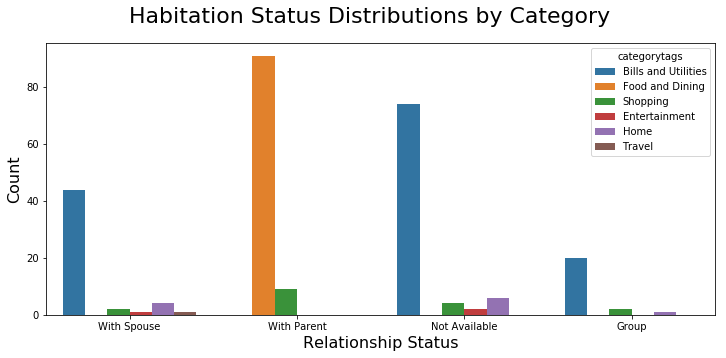

In [122]:
plt.figure(figsize=(12,5))
plt.suptitle('Habitation Status Distributions by Category', fontsize=22)

plot_2 = sns.countplot(x='habitationstatus', hue='categorytags', data=FilterData)
plt.legend(title='categorytags', loc='upper right')
plot_2.set_xlabel("Relationship Status", fontsize=16)
plot_2.set_ylabel("Count", fontsize=16)

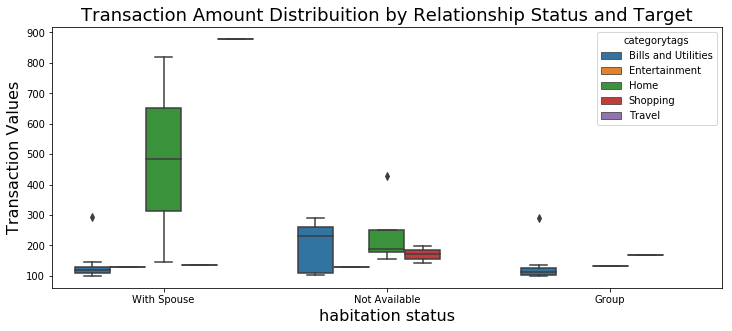

In [123]:
plt.figure(figsize=(12,5))
plot_3 = sns.boxplot(x='habitationstatus', y='currencyamount', hue='categorytags',data=FilterData[FilterData['currencyamount'] > 100])
plot_3.set_title("Transaction Amount Distribuition by Relationship Status and Target", fontsize=18)
plot_3.set_xlabel("habitation status", fontsize=16)
plot_3.set_ylabel("Transaction Values", fontsize=16)

plt.subplots_adjust(hspace = 0.6, top = 0.85)

plt.show()

In [124]:
####Explore the Income (greater than 10,000) and Job

Text(0,0.5,'Count')

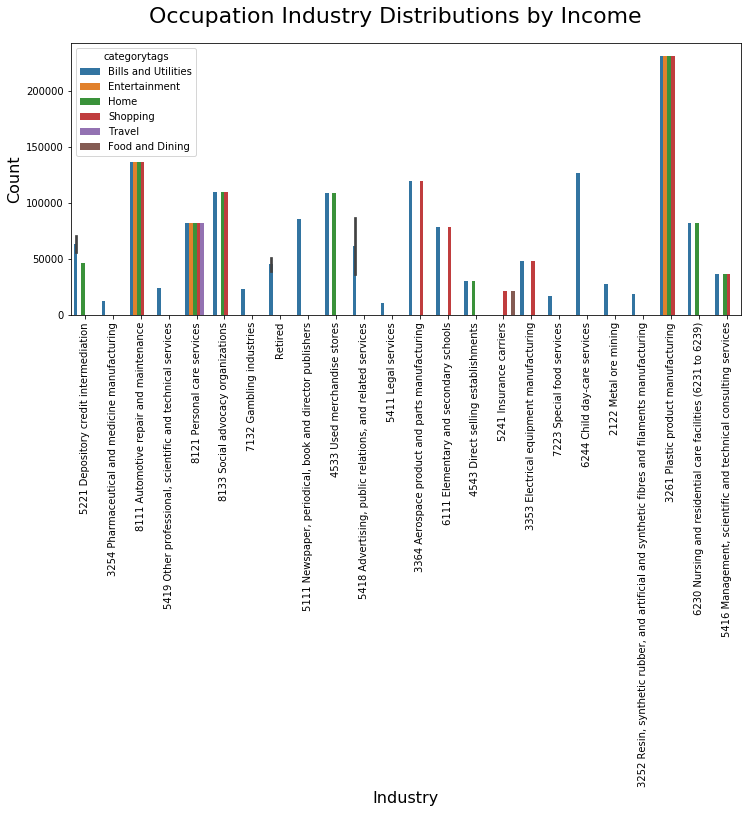

In [125]:
plt.figure(figsize=(12,5))
plt.suptitle('Occupation Industry Distributions by Income', fontsize=22)

plot_2 = sns.barplot(x='occupationIndustry', y='totalincome', hue='categorytags', data=FilterData[FilterData['totalincome'] > 10000])
plt.xticks(rotation=90)
plt.legend(title='categorytags', loc='upper left')
plot_2.set_xlabel("Industry", fontsize=16)
plot_2.set_ylabel("Count", fontsize=16)


Bills and Utilities is the Final Category selected based on the frequency of payments and their amounts in each of the graphs made.

In [127]:
# DBSCAN Algorithm for Clustering. Removed rows with 0 income
# To create DBSCAN, i am capturing age, income and transaction values

In [128]:
FilteredData = pd.read_csv("dbscan.csv")

In [227]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler

Clus_dataSet = np.nan_to_num(FilteredData)
Clus_dataSet = np.array(Clus_dataSet, dtype=np.float64)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.8, min_samples=5).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
FilteredData['Clus_Db']=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 

In [228]:
# A sample of clusters
print(FilteredData.head())

# number of labels
print("number of labels: ", set(labels))

   Age  totalincome  currencyamount  Clus_Db
0   42     40009.20          117.99        0
1   69     11898.75           83.21        0
2   44    136281.20           22.00        0
3   44    136281.20           22.86        0
4   44    136281.20          255.26       -1
number of labels:  {0, 1, 2, -1}


In [229]:
FilteredData.shape

(138, 4)

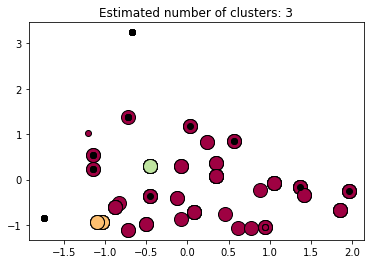

number of noise(s):  24


In [230]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = Clus_dataSet[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = Clus_dataSet[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % realClusterNum)
plt.show()

n_noise_ = list(labels).count(-1)
print('number of noise(s): ', n_noise_)

In [231]:
#Visualization
for clust_number in set(labels):
    clust_set = FilteredData[FilteredData.Clus_Db == clust_number]
    if clust_number != -1:
        print ("Cluster "+str(clust_number)+', Avg Age: '+ str(round(np.mean(clust_set.Age)))+\
               ', Avg Income: '+ str(round(np.mean(clust_set['totalincome'])))+\
               ', Avg Spending: '+ str(round(np.mean(clust_set['currencyamount'])))+', Count: '+ str(np.count_nonzero(clust_set.index)))

Cluster 0, Avg Age: 62, Avg Income: 56762, Avg Spending: 67, Count: 99
Cluster 1, Avg Age: 38, Avg Income: 18788, Avg Spending: 20, Count: 8
Cluster 2, Avg Age: 49, Avg Income: 81900, Avg Spending: 31, Count: 6


In [232]:
# Thus i will target the customers having Average age of 67, Average Income of 56762 - 81900  and have an average spending
# of 31.0 - 32.0 in transferring to new credit card.